##### First we need to import some standard packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib notebook

##### Load the dataset

In [2]:
data = pd.read_csv('RoboCupData/groundtruth.csv')

##### Extracted from http://oliver.obst.eu/data/RoboCupSimData/overview.html
The data here is the groundtruth data of the One Game Example between Gliders2016 and HELIOS2016

There is a vast dataset of RoboCup Soccer available. The dataset is made available under the Open Database License (ODbL) v1.0

The paper about this dataset can be found here http://arxiv.org/abs/1711.01703

##### Let's get an idea of how the data looks like

In [3]:
data.shape

(6329, 184)

In [4]:
data.shape[1] / 23 #Players and the ball

8.0

So it seems we have 8 variables per player for each of the 6329 frames in the dataset

Each Frame is an observation of the game at 10 frames per Second

##### Let's look at a frame

In [5]:
data.iloc[100,:]

# time                 101
 playmode          play_on
 score left              0
 score right             0
 ball_x            -0.1655
 ball_y            -2.4616
 ball_vx             0.227
 ball_vy           -1.2868
 LG1 x            -50.0951
 LG1 y             -0.3013
 LG1 vx                  0
 LG1 vy                  0
 LG1 body         -89.4084
 LG1 head         0.591877
 LG1 vieww             180
 LG1 viewq               1
 L2 x             -14.9207
 L2 y              -4.7558
 L2 vx         -0.00390625
 L2 vy         -0.00759888
 L2 body             8.469
 L2 head           38.4694
 L2 vieww               60
 L2 viewq                1
 L3 x             -14.9437
 L3 y               4.6171
 L3 vx         -0.00689697
 L3 vy           0.0135956
 L3 body          -28.2964
 L3 head          -15.2961
                   ...    
 R8 vx           -0.280106
 R8 vy           -0.209793
 R8 body          -147.578
 R8 head           132.421
 R8 vieww               60
 R8 viewq                1
 

##### Not quite. First 4 Columns are: time, playmode , score left , score right

##### Still, we can convert a frame of the data to an ndarray and reshape it to have 8 columns to have each player's values in one row

X and Y Coordinates match the standard proportions of the pitch 105 x 68m with
x ranging from -52.5 to 52.5 and
y ranging from -34 to 34

In [6]:
#So let's some frame
frame_nr = 100

#and reshape the data that each player's variables are in one row
frame = np.array(data.iloc[frame_nr,:]).reshape(-1,8)

##### So right now our data looks like this:

In [7]:
frame

array([[101, ' play_on', 0, 0, -0.1655, -2.4616, 0.22699999999999998,
        -1.2868],
       [-50.0951, -0.3013, 0.0, 0.0, -89.4084, 0.5918770000000001, 180,
        1],
       [-14.9207, -4.7558, -0.00390625, -0.00759888, 8.469, 38.4694, 60,
        1],
       [-14.9437, 4.6171, -0.00689697, 0.013595600000000001, -28.2964,
        -15.2961, 60, 1],
       [-11.6683, -15.474, -0.033493, -0.00419617, -45.7887, -45.7887,
        60, 1],
       [-12.0468, 15.3523, -0.06530760000000001, 0.0639038, -126.446,
        -55.4458, 120, 1],
       [-1.3307, -0.44239799999999996, 0.0, 0.0, -132.53, -178.53, 60, 1],
       [-0.6669010000000001, -7.0334, 0.173096, -0.072403, -24.8536,
        65.1467, 60, 1],
       [-0.8316959999999999, 6.4734, 0.0, 0.0, 80.0922, -9.90804, 180, 1],
       [1.47749, -23.9598, 0.250305, 0.00970459, 1.4504, 51.4504, 60, 1],
       [1.76331, 26.2689, 0.26969899999999997, -0.0187073,
        -4.0128699999999995, -94.0131, 120, 1],
       [1.22701, -0.24780300000000002

##### For now we can safely ignore the last 4 columns for the players (which are body pos, head pos, and view variables)
##### And the first 4 (time, play-situation, Goals L, Goals R) of the first row are not important for now either

##### Let's look at the play situations anyway to get an idea of what is included there

In [8]:
data.iloc[:,1].value_counts()

 play_on          4103
 free_kick_r       658
 free_kick_l       380
 kick_in_l         288
 kick_in_r         282
 foul_charge_l     210
 foul_charge_r     120
 corner_kick_l      96
 kick_off_l         95
 corner_kick_r      94
 kick_off_r          2
 time_over           1
Name:  playmode, dtype: int64

##### Let's remove the unwanted variables. We want to keep the x,y coordinates and the x,y velocities
##### That should result in a 23*4 array
##### Ball, TeamL, TeamR - I left the Ball in first Position to have it at index 0 to have the players line up with indices 1 to 22.
Having the Ball's position last might be more common

In [9]:
#We'll take the last 4 columns of the first row and put them below the first 4 columns of the player's data
frame_xy = np.concatenate([frame[0,4:].reshape(-1,4), frame[1:,:4]], axis = 0) #have to reshape into a row vector

We could do the reshaping for the whole sequence, but for now I'll leave it at reshaping one frame at a time

##### Verify

In [10]:
frame_xy

array([[-0.1655, -2.4616, 0.22699999999999998, -1.2868],
       [-50.0951, -0.3013, 0.0, 0.0],
       [-14.9207, -4.7558, -0.00390625, -0.00759888],
       [-14.9437, 4.6171, -0.00689697, 0.013595600000000001],
       [-11.6683, -15.474, -0.033493, -0.00419617],
       [-12.0468, 15.3523, -0.06530760000000001, 0.0639038],
       [-1.3307, -0.44239799999999996, 0.0, 0.0],
       [-0.6669010000000001, -7.0334, 0.173096, -0.072403],
       [-0.8316959999999999, 6.4734, 0.0, 0.0],
       [1.47749, -23.9598, 0.250305, 0.00970459],
       [1.76331, 26.2689, 0.26969899999999997, -0.0187073],
       [1.22701, -0.24780300000000002, 0.172806, -0.0341949],
       [40.6127, 1.3284, 0.00019836400000000003, -0.00250244],
       [14.6145, 3.0621, -0.156998, -0.154099],
       [14.1235, -1.3941, -0.179596, 0.23590100000000003],
       [15.0673, 19.3156, -0.00559998, 0.0890045],
       [15.1464, -17.338, -0.100494, -0.290695],
       [7.2312899999999996, -0.3022, -0.28880300000000003, -0.0402985],
    

### So let's plot this

##### First we should create a function that plots the pitch:

In [11]:
def drawfield(ax):
    '''
    Draws the pitch on an axes object
    '''
    plt.sca(ax)
    plt.axis([-53.5,53.5,-35,35])

    linecolor = 'w'
    
    circle = plt.Circle((0, 0), radius=9.15, fc='None', color = linecolor, lw=1)
    plt.gca().add_patch(circle)
    
    fiveyard1 = plt.Rectangle((-52.5, -9.12), 5.5, 18.32, fc='None', color = linecolor, lw = 1)
    plt.gca().add_patch(fiveyard1)

    fiveyard2 = plt.Rectangle((52.5-5.5, -9.12), 5.5, 18.32, fc='None', color = linecolor, lw =1)
    plt.gca().add_patch(fiveyard2)
    
    box1 = plt.Rectangle((-52.5, -20.12), 16.5, 40.24, fc='None', color = linecolor, lw = 1)
    plt.gca().add_patch(box1)
    
    box2 = plt.Rectangle((52.5-16.5, -20.12), 16.5, 40.24, fc='None', color = linecolor, lw =1)
    plt.gca().add_patch(box2)
    
    midline = plt.Line2D((0,0),(34,-34), c = linecolor, lw = 1)
    plt.gca().add_line(midline)
    
    leftgoalline = plt.Line2D((-52.5,-52.5),(34,-34), c = linecolor, lw = 1)
    plt.gca().add_line(leftgoalline)
    
    rightgoalline = plt.Line2D((52.5,52.5),(34,-34), c = linecolor, lw = 1)
    plt.gca().add_line(rightgoalline)
    
    topfieldline = plt.Line2D((-52.5,52.5),(34,34), c = linecolor, lw = 1)
    plt.gca().add_line(topfieldline)

    bottomfieldline = plt.Line2D((-52.5,52.5),(-34,-34), c = linecolor, lw = 1)
    plt.gca().add_line(bottomfieldline)    
    
    goal1 = plt.Line2D((-52.5,-52.5),(3.66,-3.66), c='k', lw = 1)
    plt.gca().add_line(goal1)
    
    goal2 = plt.Line2D((52.5,52.5),(3.66,-3.66), c='k', lw = 1)
    plt.gca().add_line(goal2)
    
    penalty1 = plt.Circle((-41.5,0), radius = 0.6, fc = linecolor, color=linecolor)
    plt.gca().add_patch(penalty1)
    
    penalty2 = plt.Circle((41.5,0), radius = 0.6, fc = linecolor, color=linecolor)
    plt.gca().add_patch(penalty2)
    
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        left='off',
        labelleft='off',
        labelbottom='off')

#### Then we need a function that can extract the relevant data from the dataframe and put it into an order we can work well with
##### And then we can use this to actually plot the player's and ball locations

In [12]:
#define an array for the colors [Ball, 11*TeamL, 11*TeamR]
colors = ['k'] + 11*['r'] + 11*['SkyBlue']

def get_frame_xy_data(frame_nr):
    '''
    returns the xy-coordinates and xy-velocities for the 22 players and the ball
    '''
    frame = np.array(data.iloc[frame_nr,:]).reshape(-1,8) #reshape each player's variables into one row
    return np.concatenate([frame[0,4:].reshape(-1,4), frame[1:,:4]], axis = 0) #have to reshape into one row vector


def plot_frame(fig, ax, frame):
    '''
    plots the x- and y-coordinates of players and the ball
    '''
    #Clear the axes to get rid of the old objects
    plt.cla()
    
    #get the positional data for this frame
    frame_xy = get_frame_xy_data(frame)
    #draw the pitch, players and the ball
    drawfield(ax)    
    sc = plt.scatter(frame_xy[:,0],
               frame_xy[:,1],
               c = 'w',
               edgecolors = colors,
               linewidth = 1.5)

### We can use those functions to plot a frame

<IPython.core.display.Javascript object>


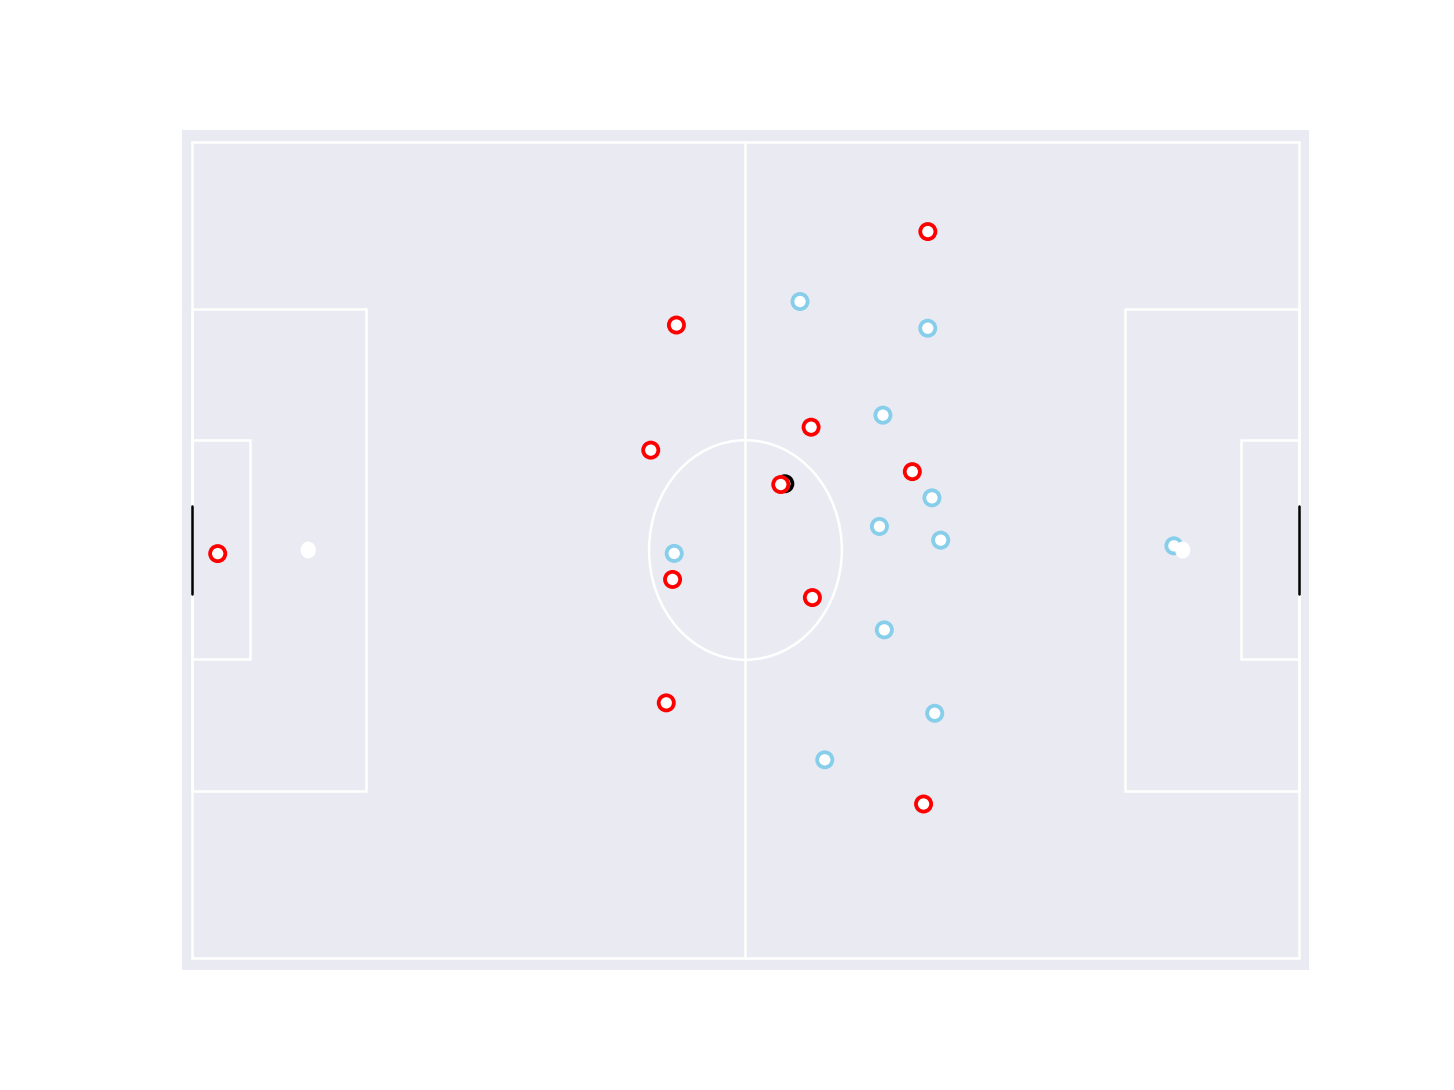

In [13]:
#Create a Figure object that holds an axes object, on which to plot on.
fig, ax = plt.subplots(figsize=(8,6))

#Call our function to plot the frame
plot_frame(fig, ax, frame = 200)

### Or we can use the power of some ipywidgets to be able to playback a whole sequence:

In [14]:
from ipywidgets import interactive, fixed, IntSlider, jslink, Layout, HBox, Dropdown, FloatSlider, Play
from IPython.display import display

In [15]:
#Create a Play Widget With Play, Stop and End Buttons
play = Play(
    #interval=1,
    value=1,
    min=0,
    max=len(data)-1,
    step=1,
    description="Press play",
    disabled=False)

#Create a Slider with which we can also move frames
slider = IntSlider(
    min=1,
    max=len(data)-1,
    layout=Layout(positioning = 'right')
)

#Create a Slider to adjust the playback speed with
speed_slider = IntSlider(
    value=1,
    min=1,
    max=4,
    step=1,
    description='Speed',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

#link the play button's value with the slider's value
mylink = jslink((play, 'value'), (slider, 'value'))
#link the play button's _step_ value with the speed_slider's value
mylink2 = jslink((play, 'step'), (speed_slider, 'value'))

<IPython.core.display.Javascript object>


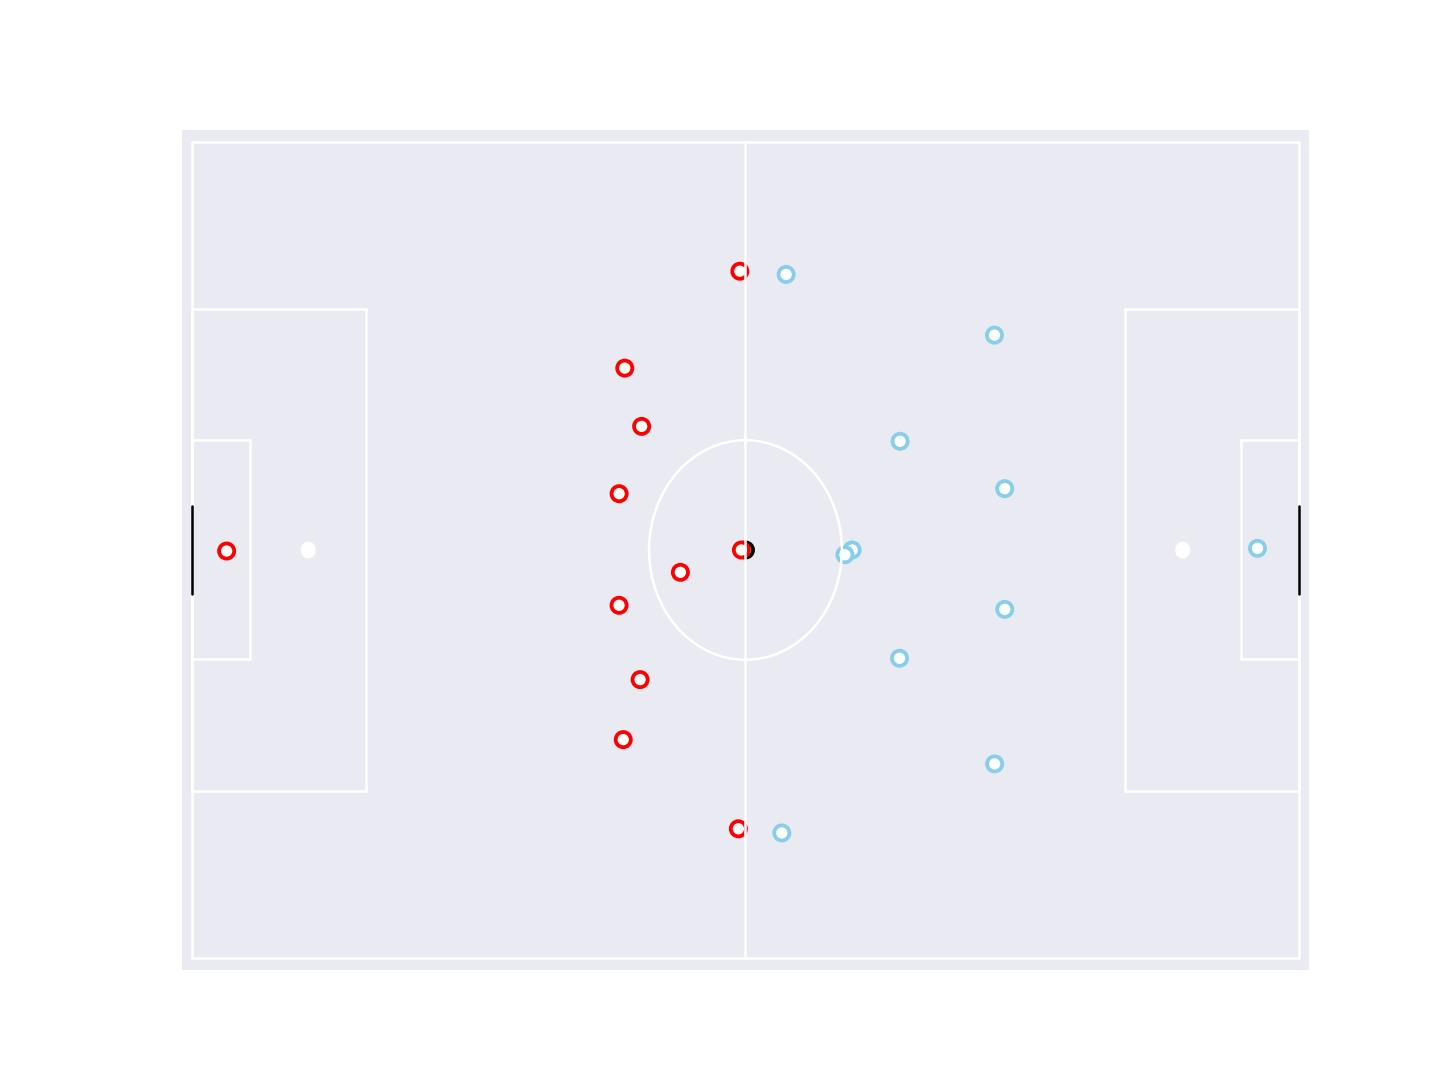

A Jupyter Widget

In [16]:
fig, ax = plt.subplots(figsize = (8,6))

#Create an interactive widget that calls the function plot_frame with the
#specified parameters with the frame being specified by the slider value
i = interactive(plot_frame, fig=fixed(fig), ax=fixed(ax), frame = slider)

#Put the Slider and the Play-Widget into a Horizontal Box
box = HBox([speed_slider, play, i]) 

#display the widgets
display(box) 

#### Now you should have a baseline to begin playing around with and for building some analytics and visualizations on top of